<a href="https://colab.research.google.com/github/trashpanda900/Data-Science/blob/main/Copy_of_Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

I received lots of help from Yale, mostly helping me with choosing the dataset and the priors for the first model.

Idea: What is the price of Amazon stock right now based on the last 100 days?
The dataset I used ranged from June 23, 2025 - October 1, 2025 and comes from the Google Finance function if google sheets.

In [2]:
amzn_url="https://raw.githubusercontent.com/trashpanda900/Data-Science/refs/heads/main/Stock%20History%20AMZN%20-%20Sheet1.csv"
amzn_data= pd.read_csv(amzn_url)
amzn_data

,Date,Close
0,6/23/2025 16:00:00,208.47
1,6/24/2025 16:00:00,212.77
2,6/25/2025 16:00:00,211.99
3,6/26/2025 16:00:00,217.12
4,6/27/2025 16:00:00,223.30
...,...,...
65,9/24/2025 16:00:00,220.21
66,9/25/2025 16:00:00,218.15
67,9/26/2025 16:00:00,219.78
68,9/29/2025 16:00:00,222.17


(array([ 1.,  4.,  2.,  7., 13., 10., 12., 14.,  4.,  3.]),
 array([208.47 , 211.447, 214.424, 217.401, 220.378, 223.355, 226.332,
        229.309, 232.286, 235.263, 238.24 ]),
 <BarContainer object of 10 artists>)

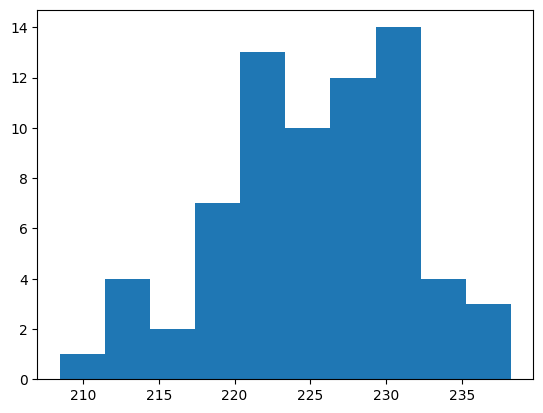

In [3]:
plt.hist(amzn_data["Close"])

Uniform since I don't really understand any context, 200 is below the lowest and 250 is above the highest.

<Axes: >

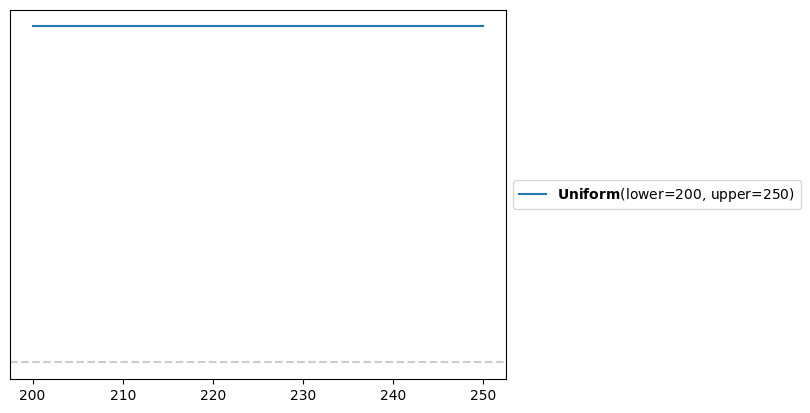

In [4]:
pz.Uniform(200,250).plot_pdf()

HalfCauchy since standard deviation is always positive, and 5 because the range of my data is ~25 and 25/4 is around 5.

<Axes: >

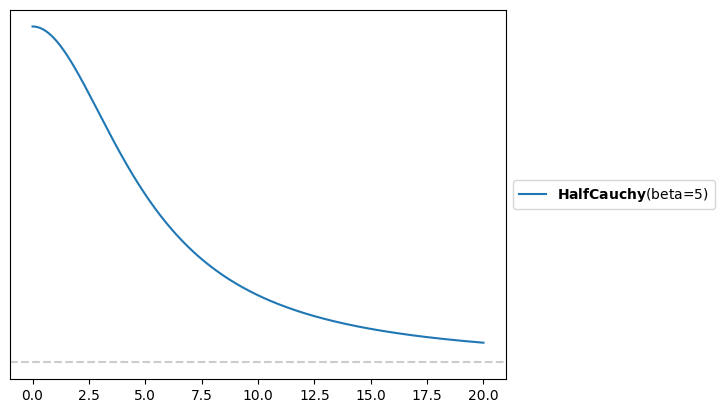

In [5]:
pz.HalfCauchy(5).plot_pdf(support=(0,20))

I chose a normal distribution initially, becuase the data is roughly centered.

In [ ]:

with pm.Model() as stock_modelN:

    μ = pm.Uniform('μ', lower=200, upper=250)


    σ = pm.HalfCauchy('σ', beta=5)


    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=amzn_data["Close"])
    idata_AMZN = pm.sample()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

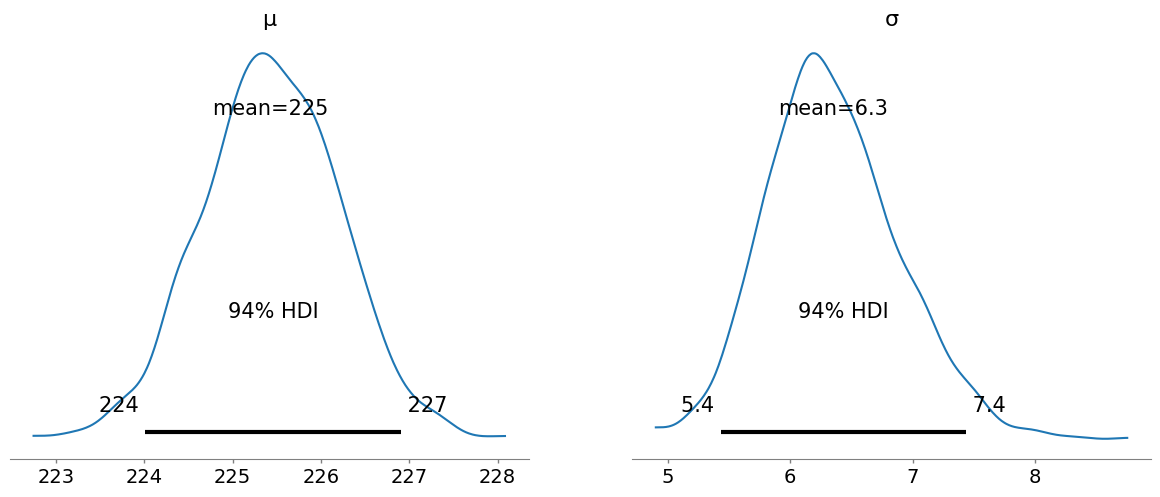

In [7]:
az.plot_posterior(idata_AMZN)

In [ ]:
pm.sample_posterior_predictive(idata_AMZN, model=stock_modelN, extend_inferencedata=True)

<Axes: xlabel='Y'>

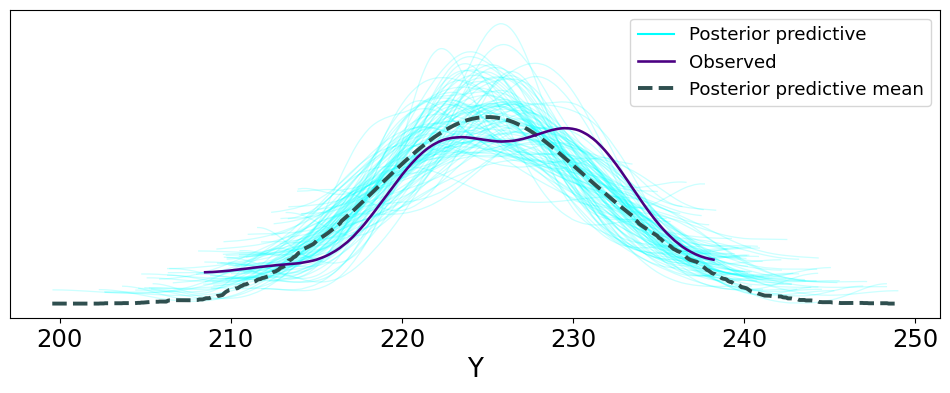

In [9]:
az.plot_ppc(idata_AMZN, num_pp_samples=100, figsize=(12, 4), colors=["Cyan", "Indigo", "darkslategrey"])

I felt that this distribution was mostly correct, but that it could be flatter, so I chose to use a StudentT dsitribution the second time so it would have a flatter Kurtosis.

In [ ]:

with pm.Model() as stock_modelN2:

    μ = pm.Uniform('μ', lower=200, upper=250)


    σ = pm.HalfCauchy('σ', beta=5)

    ν = pm.Exponential('ν', lam = 1/30)

    Y = pm.StudentT('Y',nu=ν, mu = μ, sigma = σ, observed=amzn_data["Close"])
    idata_AMZN2 = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_AMZN2, model=stock_modelN2, extend_inferencedata=True)

(200.0, 250.0)

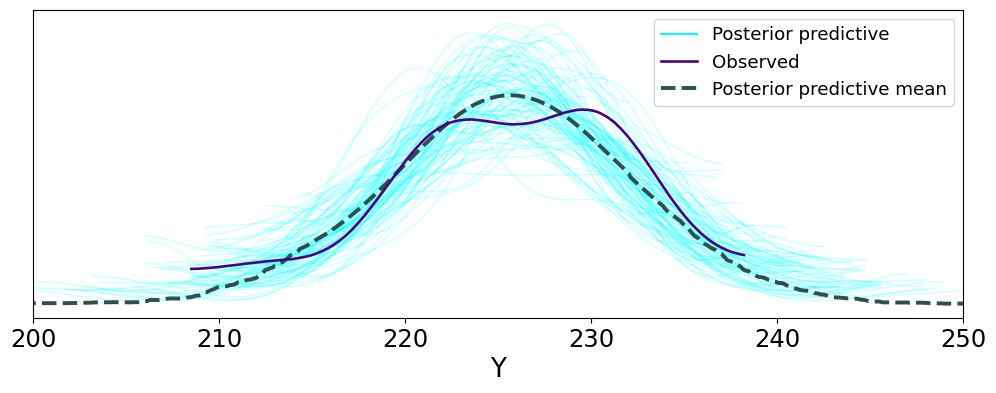

In [12]:
a = az.plot_ppc(idata_AMZN2, num_pp_samples=100, figsize=(12, 4), colors=["Cyan", "Indigo", "darkslategrey"])
a.set_xlim(200,250)

The actual price of AMZN on 10/2/2025 (The day we were trying to predict) is 222.41. I think that my model improved when I changed the likelihood, so I am happy that my model imporved. I think it would have been more interesting if I had found a distribution that didn't work because I feel my data was not very interseting.